In [53]:
import json
import csv
import sys

db = 49220

def szures(s):
	s = s.lower()
	s = s.replace("\u00e0", "a")
	s = s.replace("\u0103", "a")
	s = s.replace("\u00e1", "a")
	s = s.replace("\u00e2", "a")
	s = s.replace("\u0391", "a")
	s = s.replace("\u03b1", "a")
	
	s = s.replace("\u00e9", "e")
	s = s.replace("\u00e8", "e")
	
	s = s.replace("\u00ed", "i")
	s = s.replace("\u00ec", "i")
	s = s.replace("\u00ee", "i")
	
	s = s.replace("\u00f3", "o")
	s = s.replace("\u00f6", "o")
	s = s.replace("\u0151", "o")
	s = s.replace("\u039f", "o")
	
	s = s.replace("\u039b", "l")
	
	s = s.replace("\u00fa", "u")
	s = s.replace("\u0171", "u")
	s = s.replace("\u00fc", "u")
	s = s.replace("\u016b", "u")
	
	s = s.replace("\u015f", "s")
	s = s.replace("\u0219", "s")
	
	s = s.replace("\u021b", "t")
	s = s.replace("\u0163", "t")
	
	s = s.replace("\u0e4f", "")
	s = s.replace("\u032f", "")
	s = s.replace("\u0361", "")
	
	s = s.encode('ascii', 'ignore').decode('utf8')
	
	return s

with open("proba.txt") as f:
	s = f.read()
s = szures(s)
data = json.loads(s)
pure_data = json.loads(s)

print(data[:5])

[{'id': 0, 'birth': 'keresztur', 'name': 'boholt lore', 'studwhere': 'orbán balázs gimnázium, székelykeresztúr', 'livesin': 'szèkelykeresztur, harghita, romania'}, {'id': 1, 'livesin': 'csikszentdomokos', 'other1': 'venczel józsef iskolaközpont   csíkszereda', 'birth': 'csikszereda', 'name': 'nelut kémenes'}, {'marriedto': 'péterfy eniko', 'studwhere': 'none', 'livesin': 'angyalföld, budapest, hungary', 'workwhere': 'drogmentes világért alapítvány   magyarország', 'name': 'kovács iulia', 'birth': 'udvarhely', 'id': 2, 'workwhat': 'helyettes ügyvezető'}, {'id': 3, 'name': 'monica ana szep', 'birth': 'barot', 'livesin': 'budapest, hungary'}, {'birth': 'szentgyorgy', 'name': 'matei szabolcs', 'marriedto': 'lászló tünde', 'id': 4}]


In [2]:
def count_occurence_of(col):

    dict = {}
    for i in data:
        if col in i:
            b = i[col]
            if b in dict:
                dict[b] = dict[b] + 1
            else:
                dict[b] = 1
    return dict

birth_cities_count = count_occurence_of("birth")
print(birth_cities_count)

{'keresztur': 2830, 'csikszereda': 3508, 'udvarhely': 3310, 'barot': 2335, 'szentgyorgy': 3494, 'kezdi': 3384, 'kovaszna': 3915, 'szovata': 1522, 'vasarhely': 3823, 'gyergyo': 3461, 'vlahica': 2329, 'segesvar': 2539, 'kolozsvar': 3942, 'balan': 2312, 'regen': 2770, 'toplita': 2564, 'parajd': 1182}


In [3]:
birth_cities = list(birth_cities_count.keys())

stud_dict = dict.fromkeys(birth_cities,0)
for i in data:
    if "studwhere" in i:
        if i["studwhere"] != "None":
            city = i["birth"]
            stud_dict[city] = stud_dict[city] + 1

work_dict = dict.fromkeys(birth_cities,0)            
for i in data:
    if "workwhere" in i or "workwhat" in i:
        city = i["birth"]
        work_dict[city] = work_dict[city] + 1

print(stud_dict)
print(work_dict)

{'keresztur': 1313, 'csikszereda': 1605, 'udvarhely': 1518, 'barot': 1124, 'szentgyorgy': 1623, 'kezdi': 1609, 'kovaszna': 1880, 'szovata': 664, 'vasarhely': 1720, 'gyergyo': 1477, 'vlahica': 964, 'segesvar': 1124, 'kolozsvar': 1767, 'balan': 956, 'regen': 1180, 'toplita': 1192, 'parajd': 459}
{'keresztur': 1585, 'csikszereda': 1777, 'udvarhely': 1673, 'barot': 1258, 'szentgyorgy': 1900, 'kezdi': 1741, 'kovaszna': 2081, 'szovata': 741, 'vasarhely': 2065, 'gyergyo': 1700, 'vlahica': 1132, 'segesvar': 1335, 'kolozsvar': 2235, 'balan': 1107, 'regen': 1436, 'toplita': 1341, 'parajd': 611}


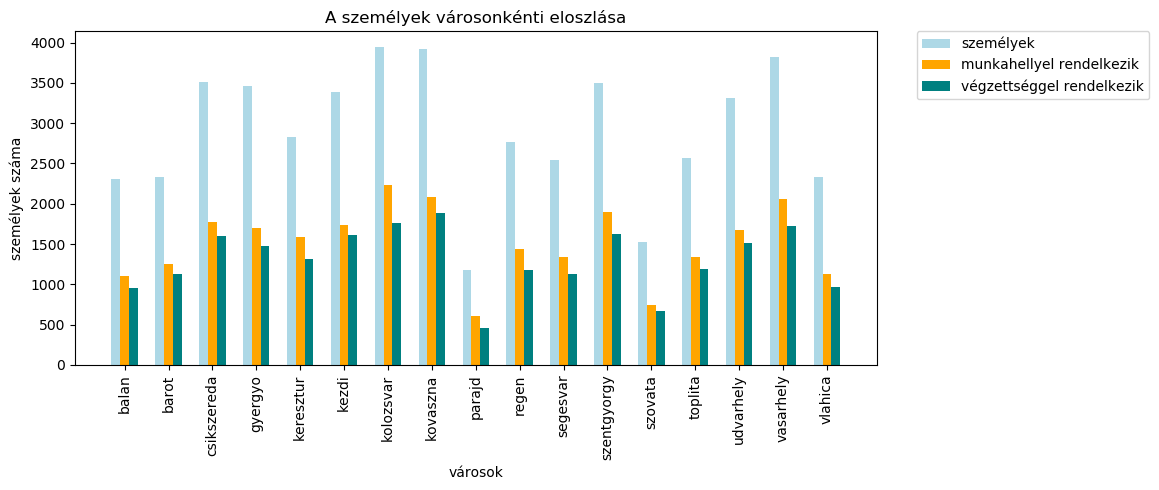

('balan', 'barot', 'csikszereda', 'gyergyo', 'keresztur', 'kezdi', 'kolozsvar', 'kovaszna', 'parajd', 'regen', 'segesvar', 'szentgyorgy', 'szovata', 'toplita', 'udvarhely', 'vasarhely', 'vlahica')


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5), dpi=100)

birth_list = sorted(birth_cities_count.items())
stud_list = sorted(stud_dict.items())
work_list = sorted(work_dict.items())
x1, y1 = zip(*birth_list)
x2, y2 = zip(*work_list)
x3, y3 = zip(*stud_list)

bar_width = 0.2
index = np.arange(17)

bar1 = plt.bar(index, y1, bar_width, color='lightblue', label='személyek')
bar2 = plt.bar(index + 0.2, y2, bar_width, color='orange', label='munkahellyel rendelkezik')
bar3 = plt.bar(index + 0.4, y3, bar_width, color='teal', label='végzettséggel rendelkezik')


plt.xticks([i + 0.2 for i in range(17)],sorted(birth_cities), rotation=90)
plt.xlabel("városok")
plt.ylabel("személyek száma")
plt.title("A személyek városonkénti eloszlása")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
print(x1)

In [10]:
schools = count_occurence_of("studwhere")
for key, el in schools.items():
    print(key, el)

orbán balázs gimnázium, székelykeresztúr 96
none 181
nagy istván művészeti liceum 40
sapientia emte marosvásárhely 28
gÁbor Áron szakkÖzÉpiskola 407
universitatea transilvania brasov 238
egeszsegugyi foiskola szekelyudvarhely 1
akg bp, sapientia emte csíkszereda 1
egeszsegugyi liceum 6
tamási Áron gimnázium 30
egeszsegugyi technikum csikszereda 1
umf iuliu hatieganu cluj napoca 45
bányai jános műszaki szakközépiskola 41
uni wuppertal 1
az Élet iskolája 30
tessedik sámuel főiskola 2
nagy mózes elméleti líceum   kézdivásárhely 154
babeş bolyai university 726
umf targu mures 44
academia de muzica "gheorghe dima" cluj napoca 17
babes bolyai university of cluj 1
gépgyártó iskolaközpont 114
palló imre művészeti szakközépiskola 37
st. helena junior high school 1
colegiul universitar medical bv 1
marosvasarhelyi szinmuveszeti egyetem 5
bányai jános szakközépiskola 102
facultatea de fizica, universitatea babes bolyai 3
baróti szabó dávid 184
post liceal sanitar eugen nicoara reghin 2004 1
unive

extensia universitară gheorgheni 2
facultatea de chimie industriala si ingineria mediului timisoara 1
facultatea de filosofie, universitatea bucuresti 1
universität salzburg 1
bbte reformatus tanarkepzo kar 1
aurel persu 4
nincs 2
ma, nicolae titulescu university, bucuresti 1
music academy of the west 1
universitatea ecologica traian deva 1
facultatea de constructii si arhitectura iasi 1
colegiul national "i.c.bratianu" hateg 2
sc.postlic.sanitara gh. marinescu 1
university of ljubljana 2
budapesti corvinus egyetem 11
szinitanház békéscsaba 1
constantin brancusi  sf. gheorghe 1
university of szeged jgypk 1
universitatea de arte "vatra" 1
református kollégium sepsiszentgyörgy 8
bod péter tanítóképző 12
grup scolar ovid densusianu calan 1
bod péter aszisztensképző föiskola 1
elte bárczi gusztáv gyógypedagógiai kar 1
nem 1
dr banyai janos 6
liceul teoretic "mihai eminescu", cluj napoca 1
management brasov 3
ulbs sibiu 3
colegiul naţional unirea 3
parajd 3
protestant theological institute 

scoala postliceala sanitara mihai eminescu toplita 1
ubb, fsega, cluj napoca 2
vestige academy   make up 1
ut cluj calculatoare 2
geografie turism 1
asistent medical generalist 12
nu am facultate 1
colegiul naţional "mircea eliade" sighişoara 3
gabor aron muszaki oktatasi kozpont 5
universitatea hyperion, facultatea de stiinte economice 2
ies lluis de peguera 1
sport 1
facultatea de automatica si calculatoare, universitatea tehnica din cluj napoca 7
master degree in european private law 1
ase bucuresti   master contabilitate, audit si informatica de gestiune 1
facultatea de medicina veterinara timisoara 1
lucian blaga reghin 1
dimitrie cantemir university 1
móra ferenc Ámk 1
safs   swiss academy of fitness and sports 1
fanshawe college 3
paintball word! 1
universitatea transilvania 5
university of winchester 1
ipssar alberghiero 1
mihail sturdza 1
liceul tehnologic economic administrativ piatra neamţ 2
budapest i károli gáspár református egyetem 2
facultatea transilvania brasov 2
faipa

università delle arti vampiriche 1
vasile alecsandri bacau 1
ecole supérieure art et design de st etienne 1
grup scolar economic administrativ berde aron 5
bábes bolyai 2
universitatea d smecherie 1
ueb bucuresti 1
kós károly Építőipari szakközépiskola, csikszereda 2
elte Ájk 2
facultatea de litere, universitatea bucuresti 3
lucian blaga szeben 2
universitatea "bogdan vodă" din cluj napoca 1
tcm cluj 1
eu pass,budapest 1
universitatea babeŞ   bolyai, facultatea de sociologie si asistenta sociala 1
visit graz 1
facultatea s.a.i.a.p.m. sibiu 1
universitatea spiru haret brasov/facultatea de management 1
dr.palló imre művészeti szakközépiskola 2
gábor dénes 1
banyai janos szakozepiskola 1
"lucian blaga" nagyszeben, "simion bărnuţiu" jogi kar, mesterképző 1
Școala gimnazială "kemény jános" Általános iskola 1
colegiul naţional george bariţiu 1
designer 1
udvarhelyi hírportál 1
emte sapientia (csikszereda) 1
scoala miron cristea toplita 1
universitatea "vasile alecsandri" din bacău 1
grup sco

master managementul resurselor umane 2
université de nantes 1
psychology 2
louise pasteur csikszereda 1
mtf   magyar táncművészeti főiskola 1
érettsegi 2
controlul si expertiza produselor alimentare 1
eigenbetrieb leben und wohnen der landeshauptstadt stuttgart 1
ludwig maximilians universität münchen 1
peisagistica , usamv cluj napoca 2
karl franzens university graz, austria 1
stonebridge colleges 1
nicolae balcescu intorsura buzaului 1
facultaea de educatie fizica si sport 2
.............. 2
nemnet 1
link academy 1
folyamatba 1
yale university 1
karoli gaspar university 1
facultatea de psihologie ubbb 1
ubb faculty of political, administrative and communication sciences 1
faculatea de stiinte juridice si administrative 1
szte jgypk 2
colegiul tehnic edmond nicolau 1
orvosi es gyogyszereszeti egyetem marosvasarhely 2
ubb cluj napoca   fspac   publicitate 1
elite cosmetix körmös akadémia 1
birmingham city university 1
ase 1
life university 1
babes bolyai universität klausenburg 1
unive

ubb, studii de securitate. 2
batthanyi ignac 2
szebeni „lucian blaga” egyetem közgazdasági kar 1
scoala superioara de aviatie civila 1
szte Állam  és jogtudományi kar 2
kre Ájk 1
sunt inca elev 1
universitatea lucian blaga   facultatea de inginerie  1
scooby doo 1
hiperyon bucuresti 1
efeb Üzleti szakközépiskola 1
smp negeri 1 kembangbahu 1
brassai samuel elmeleti liceum 1
soproni Óvónőképző intézet 1
még sehol. 1
8 általános 1
blonda de la drept 1
filmmaker & wedding cinematographer 1
universitatea tehnica targu mures 1
barathiyar university 1
ruhatervezés 1
szfe 1
usamv cluj napoca facultatea de agricultura 2
one direction music university 1
nagyvarad partium egyetem 2
kereskedelmi 1
zejk domokos 1
partiumi keresztéy egyetem 1
institutul politehnic bucuresti 1
technical university of graz 1
universitea tehnica cluj napoca 1
tu wien 1
sulyok istvan foiskla 1
scoala postliceala studia 1
domokos kazmer(szováta) 2
brassói egészségügyi technikum 1
toni & guy hairdressing academy 1
louis p

the master's college 1
louis pasteur egészségügyi főiskola 1
brasso közgáz 1
facultatea de constructii   utcn 1
laborant 1
anglo american university 1
football 1
zimmethausen iskolakozpont borszek 1
debreceni egyetem egészségügyi kar 1
vatel 1
university of warsaw 1
universitatea babes bolyai targu mures 1
u.n.a.t.c."i.l.caragiale", facultatea de teatru 1
universitatea de arte "george enescu" iasi 1
ma visual and media anthropology 1
universitatea politehnica "gh. asachi" iasi 1
nemzeti közszolgálati egyetem   hadtudományi és honvédtisztképző kar 1
geografia turismului gheorgheni 1
eötvös loránd tudományegyetem Állam  és jogtudományi kar 1
bathany ignantcz 1
iskola 1
jurnalism şi relaţii publice, fŞsu, ulbs 1
master's degree in quality management 1
scoala generala sf andrei 1


In [8]:
workwhat = count_occurence_of("workwhat")
for w in sorted(workwhat, key=workwhat.get, reverse=True):
    print(w, workwhat[w])


owner 154
manager 119
administrator 108
engineer 65
óvónő 60
tanár 51
photographer 47
operator 45
bartender 44
software engineer 41
teacher 40
tanÍtÓnŐ 38
software developer 36
director 36
tulajdonos 31
asistent medical generalist 30
graphic designer 28
volunteering 27
project manager 26
volunteer 26
consultant 25
web developer 25
general manager 24
truck driver 23
sofer 23
founder 22
pincér 22
receptionist 22
professor 22
hair stylist 21
waitress 21
cashier 21
boss 21
managing director 21
actor 21
economist 20
mindenes 20
ceo & founder 20
tanító 20
president 20
secretary 19
designer 19
assistant manager 18
barman 18
management 18
asistent medical 18
member 17
alkalmazott 17
sales 17
elnök. 17
medical assistant 17
former internship 17
eladó 17
inginer 17
munkás 17
dancer 16
táncos 16
architect 16
java developer 16
executive director 16
djing 15
phd student 15
fogorvos 15
marketing manager 15
supervisor 15
üzletvezető 15
driver 15
owner operator 15
színész 14
ügyvezető 14
team leader 14

former cleaner 2
former decorator floral 2
former software developer 2
studying psychology 2
medic rezident gastroenterologie 2
eladónő 2
1000 mester 2
ifjúsági vezető 2
hardwer & software developer 2
asztalos,sofor 2
crocodile 2
intezo futsal 2
javító műszerész 2
former assistente 2
former elnök. 2
former product manager 2
resident mc 2
munkanélküli 2
former sofőr 2
medic rezident protetica dentara 2
kozgazdasz 2
videographer 2
consilier local 2
felszolgáló 2
data entry operator 2
segédlelkész 2
agent/sofer 2
eigenaar 2
közgazdász 2
former fogászati aszisztens 2
former security guard 2
tanár edző, igazgató 2
former driver 2
butcher 2
defender 2
ez is az is 2
quality coach 2
lector universitar doctor 2
designer/owner 2
lorry driver 2
cadru didactic universitar 2
assistant to the trading manager 2
public relations assistant 2
model (people) 2
pilates instructor 2
hairdressing 2
magyar német szakos tanár 2
honorary president 2
civil/structural engineer 2
asistentĂ medicalĂ/ 2
Állatorvos 

ui designer 1
former cantor (christianity) 1
cercetator in tehnologia constructiilor de masini 1
administrator & hair style 1
former sclav 1
privat 1
it infrastructure support 1
membru cu drept de vot 1
seful meu 1
former atleta 1
cremona 1
teológiai hallgató 1
information manager 1
communications analyst 1
mother of twins 1
hse officer 1
scolarita 1
driver education instructor 1
semi kulonos 1
Ügyvezető. 1
kézápoló műkörömépítő 1
teszter 1
sucursala cluj napoca 1
corepetitor 1
agyturkasz pszihologus 1
erdesztehnikus 1
acasã la mama şi la tata 1
solutions architect 1
medic rezident oncolog 1
crupier / dealer 1
owner, freelance calligrapher 1
former geschäftsführung 1
ofiter de politie 1
infermiera 1
consilier judetean 1
picerno 1
product planner 1
former kauffrau im gesundheitswesen 1
operator maşinist 1
producer/rap artist 1
dc support executive 1
former summer intern 1
Învãtãtor 1
képviselőjelölt 1
lucrator gestionar 1
realizator cinema l!ve și jurnalul de noapte 1
rendszergazda   te

phd 1
former tanár,óvónő 1
network technician 1
hairstylist/owner 1
lélekgyógyász terapeuta 1
subofiter operativ 1
co founder and conductor 1
curier. 1
television producer 1
ati s rezidens orvos 1
owern's 1
picker 1
ceo & founder/ professional photographer,cinematographer, 1
shift leader assistant 1
stalp de sprijin 1
dance teacher 1
jucator de fotbal 1
singer/songwriter/guitarist 1
mechanical engineer   design department cluj napoca 1
medic specialist chirurgie generala 1
cczr 1
wissenschaftlicher mitarbeiter 1
tourism agent 1
amg asistent medical generalist 1
box club arena 1
host/hostess 1
purchasing manager 1
patron, sofer 1
director regional 1
a3 tank montage 1
customer service executive 1
Üzletvezető és eladó 1
coordinator 1
serv. cabinet 1
former ügyvezető asszisztens 1
financial services consultant 1
conversion marketer | web analyst 1
delegation 1
former director general 1
pianist/accompanist 1
saschiz 1
napkollektor es viz szerelo szakember! 1
former pénz költés 1
herkenytyű 

informatikus, számítástechnika tanár 1
hostess 1
jegyelado 1
quality assurance engineer (qa engineer) 1
administrație 1
former jógaoktató/gyógymasszôr 1
unnamed page 647405091972767 1
laborant 1
choreographer/dancer/teacher 1
salvator terasz 1
owner/architect 1
profesor pt invatamantul primar 1
selbstständig 1
gépi forgácsoló (gépkezelő) 1
elnok 1
accounts payable/payroll 1
fürstenfeldbruck 1
dse 1
former sa stau lenevind tot timpul la pc si sa am orce vreau instalat 1
logisztikai controller 1
finance member 1
inspector itp 1
h 1
junior consultant 1
cuptorist 1
şöför 1
future analyst 1
fodraszno 1
actor/coreographer 1
carer 1
gépkezelő 1
au pair/nanny 1
volunteer / chairman 1
biztosítás közvetítő 1
Általános ügyintéző 1
ospatara 1
šofer 1
junior research fellow 1
a operator 1
cuisinier 1
szakfelügyelő 1
hírszerkesztő bemondó 1
former munkas 1
sales coach/trainer 1
pizza & szendwics 1
vezetö 1
asisten medical coordonator 1
english and german teacher 1
lovaszat 1
former kicsi fonok 1
for

iegzisto explicatie 1
általános ügyviteli igazgató 1
maintenance 1
machine operator 1
cantor (christianity) 1
call center 1
főmunkatárs 1
mama 1
koptatom a sulipadoot :) 1
dtp/graphic designer 1
former trabajador 1
creative executive 1
elárusító nő 1
former composer 1
elektroniker für betriebstechnik 1
csomaolo 1
coordonator de transport 1
jucatoare 1
preparator agancsfarago 1
kémia szakos tanár, igazgatóhelyettes 1
antrenor personal fitness & bodybuilding forza gym targu mures 1
cristhmas decorations designer 1
gestionar vinzator 1
receiving operator 1
pincer es konyhai kisegito 1
international communication assistant 1
maistru instructor 1
krankenpflegeschülerin 1
communications officer 1
coordonator program 1
former kéz és lábápoló 1
d man 1
jobb átlövő 1
ügy vezetője 1
manager/creative director 1
büfés 1
ghid de turism 1
reporter șobolan 1
spartan warrior 1
suporter fanatik 1
reprezentant comecial 1
human resources analyst 1
müvészeti vezető 1
sefa la inima printului meu 1
számvite

In [9]:
workwhere = count_occurence_of("workwhere")
for w in sorted(workwhere, key=workwhere.get, reverse=True):
    print(w, workwhere[w])

facebook 164
még sehol : ) 156
szentegyházasfalu 149
self employed 127
toplita 127
tengleng kft. 114
székelyudvarhely 111
germany 95
németország 94
parajd 92
valkes srl 80
romániai magyar cserkészszövetség 68
elev 67
tanuló 67
gaál mózes iskola 66
kaufland 66
az iskola padját koptatom  .  :$ 62
scolar 60
autoliv 53
acasa la mama si la tata:)):)) 53
domokos kázmér iskolacsoport 49
italy 48
new fashion 46
avon 46
student 46
nem dolgozom,mivel a rohadt iskola padját koptatom :) 45
zarah moden 44
caritas alba iulia 44
spitalul clinic judetean de urgenta tg mures 43
oriflame 41
suli 41
bertis 40
háromszék táncegyüttes 39
budapest, hungary 39
orbán balázs gimnázium 38
petőfi sándor Általános iskola, székelykeresztúr 37
spitalul clinic judetean de urgenta targu mures 37
gyereknevelés 37
freelancer 35
amigo&intercost 35
none 33
berde mózes unitárius gimnázium 31
banca transilvania 31
retired 30
polgármesteri hivatal 29
iskola 29
danubius health spa resort sovata **** 29
székelyudvarhelyi város

sergiana poiana marului bunataturi din ardeal 4
1puredesign 4
még nem tartok ott 4
explosiv ski 4
waberers romania s.a 4
hewlett packard 4
rádió gaga 4
babes bolyai university 4
tribel ff 4
cargus 4
kappa antipasti gmbh 4
tega rt   sa 4
munich 4
kÉsz Építő és szerelő zrt. 4
madéfalvi sportkör   clubul sportiv siculeni official 4
biblioteca judeteana "bod peter" megyei konyvtar 4
civitas alapítvány 4
eurato sa 4
logmein 4
banana sanctuary 4
liceul tehnologic "apor peter" 4
rotaprint nyomda 4
old city pub 4
depisto star 4
ipj harghita 4
erlascom 4
fabrica de fericire :x 4
fitpoint 4
magyar máltai szeretetszolgálat 4
ikos conf sa 4
tanügy 4
dental technician 4
piratii de pe poklos 4
tamási Áron gimnázium székelyudvarhely 4
perfekt abc 4
strindberg official 4
general manager 4
általános orvos 4
balassi intézet 4
strainatate 4
sláger center 4
szabadidőkalauz 4
zathureczky berta otthon 4
home 4
a hivatal 4
selwerk 4
rome 4
g's barway 4
dhd  fogászati rendelő / cabinet stomatologic 4
sc smara

urban art & dance studio 2
firma sc he ba cons srl sovata 2
avantgarde szepsegszalon 2
tvr tirgu mures 2
ensino fundamental 2
satans folcloric killer company 2
trw automotive 2
csíkszéki emi 2
private practice in psychotherapy 2
fireflies 2
telenor asa 2
liceul teoretic "onisifor ghibu" 2
logroño 2
digitalove 2
solista 2
freudenberg 2
dr. harald lang gmbh, allergieambulatorium 2
riot games 2
aegon romania 2
independent artist 2
petőfi sándor Általános iskola, oroszhegy 2
djing 2
mastertent 2
naturista üzlet 2
hotel pacsirta**** 2
expert contabil 2
calibra travel 2
avon cosmetics romania 2
netto marken discount 2
pankastic 2
dj papaya club 2
empresa metalurgica 2
marmipal srl. 2
gamax laboratory solutions ltd. 2
facultatea de studii europene cluj napoca 2
tulip food company schüttorf 2
smr hungary bt mosonmagyaróvár 2
quantumpharm 2
slovakia 2
ujszekelyi tanacs 2
europa 2
benedek elek Általános iskola 2
figura stúdió színház gyergyószentmiklós 2
konsthallen i hishult 2
arosa industries 

medic rezident medicina interna 2
rexo gold 2
celebrity cruises 2
vecker 2
doktoranduszok országos szövetsége történelem  és politikatudományi osztály 2
stilist protezist unghii tehnice 2
klausen pub & grill 2
most nincs 2
vendéglátó 2
cjd altensteig 2
2parale 2
lánglovagok Önkéntes tűzoltóság csomafalva 2
euro ecologic 2
főállásban anyuka vagyok 2
gaál mózes Általános iskola 2
desso hairsalon & school 2
gpn chichis 2
magyar külügyi intézet 2
semmelweis egyetem 2
f1 mclaren honda team 2
primaria cluj napoca 2
birou notarial dobrean 2
directia silvica mures 2
infosys bpo poland 2
szte onkoterápiás klinika 2
auto oil 2
sc trodat srl 2
bankar 2
ferencvárosi torna club 2
tfb faber 2
missio alapítvány, nagyvárad 2
csomafalviturizmus.ro 2
notar public 2
primăria municipiului sfântu gheorghe 2
hightstown 2
northampton general hospital 2
cinema city targu mures 2
sono il datore di lavoro di me stesso 2
pyronova romania 2
frieslandcampina 2
wireless center webshop 2
hotel ozone 2
maison de retr

sngn romgaz sa 2
szigligeti színház 2
catalysts 2
redstar 2
pizza oriente vendéglő 2
sc d.p. cv. sa 2
molecular beams 2
icos conf s.a. 2
fehmel gemusebau 2
csíkszereda, emte sapientia 2
az erő Útjai 2
molnár józsiás iskola 2
1001 féle.! 2
konfekció r.t. 2
rewe romania 2
west dream fashion 2
kézdiszék 2
eletricista 2
hófehérke napközi 2
horvath service 2
loading                 99% 2
colder 2
dorsum zrt. 2
benedek elek tanítóképző 2
counter strike 1.6 2
io me faccio li cazzi mia!!! 2
virgin active 2
porcina 2
libero events 2
freestyle football 2
almi rom srl 2
canute group ltd 2
xeless general trading & services ltd. 2
media galaxy 2
bethlendi tamás photography 2
wherever i am 2
prevost hungária kft. 2
korhaz 2
tgs alarm srl 2
budapestdental.hu 2
oracle 2
c+c raktár uzlet merkur uzletlánc 2
taylor kft. 2
néri szent fülöp katolikus Általános iskola 2
gazdálkodok 2
gastronomie 2
student (publication) 2
Ördögborda néptáncegyüttes 2
transfarm gyógyszertár 2
deuerer 2
cab.stom."stomax" 2
mob

Éptech invest kft. 1
phÖnix seniorenzentrum 1
klinikum rechts der isar der tu münchen 1
poliţia harghita 1
cuptorul de aur 1
ristopub san miguel 1
principe odone 1
men in tress 1
framesi szépségszalon 1
hotel restaurante arco jalón 1
székelyudvarhelyi városi kórház kórszövettani laboratorium 1
mömlingen 1
smart staff kft. 1
senso kft 1
dh tc marketing 1
fun fm, retro radio 1
wildlachs räucherei bremer gmbh 1
onefinestay 1
hotel ploberger 1
chatham bars inn 1
flamand pékség 1
sanam jung 1
zumzi 1
teatrul aureliu manea turda 1
kibédi református gyülekezet reformed congregation chibed 1
ada fabrica de mobila srl 1
gentleman forever 1
at kse   kézdivásárhelyi sportegyesület 1
marionette 1
liceu 1
dentalsoft fogászati komplexum 1
arcturus hungary ltd 1
amb components hungary bt. 1
logic optimum ltd. 1
select metlemplast srl 1
the walking dead 1
sc karlo roberto trade com srl 1
sc balmar construct srl 1
metropolitan Étterem 1
total 1
darian drs 1
kuka 1
ady endre gyógyszertár budapest 1
drag

csömör 1
centre mèdic catalonia 1
fsp global 1
iasi, romania 1
tattoo lovers 1
asistenta medicala 1
hulk 1
amichay.hu 1
zug.zone 1
cimbora napköziotthon 1
wopereis 1
kawasaki kfx 700 1
markbi kft 1
bugetarii veseli 1
scutauto.ro 1
fegis kft 1
ibiza 1
só haj panzió 1
callas café & restaurant 1
cfr 1907 cluj napoca 1
the swan inn chiddingfold 1
malga valbiolo   tonale 1
hotel hefaistos sovata 1
bijuterii si accesorii handmade 1
designer and fashion blogger: ilka von torok 1
appril s e c r e t section 1
bartending institute 1
pékség 1
móra ferenc Ált. isk. 1
tanyacsárda kft 1
the pint of beer industries 1
mester lÖvÉsz idegen lÉgÍÓs 1
hotel haslbach fgz 1
beadit   create to study 1
christine's butchery 1
brescia 1
outlet by ovidiu criste 1
kekiringo virag es ajandekbolt 1
rbc imobiliare 1
ceasuri de perete 1
jatszma.ro 1
chu de montpellier 1
club sportiv politehnica cluj 1
symbol budapest 1
tisza ortopédtechnika kft. 1
mobile distriution 1
joben bistro 1
római katolikus plébánia, kézdisze

la piazza bar&gelateria italiana 1
sc apjm srl caparol 1
isoflex bau kft 1
ora rode 1
as service & sales gmbh 1
fimatex 1
meda prod bucuresti 1
x factor 1
o&v professional 1
facultatea de Ştiinţe politice, administrative şi ale comunicării, ubb cluj 1
ristorante vizi e sfizi 1
romaqua group 1
trattoria venezia   velence vendéglő 1
inia dinia 1
farmaciile ropharma 1
centrul de excelenta "tricolorii 11" 1
milestone journeys 1
banca cooperatista miko,balan 1
avangarden tractorul 1
le salon hair & beauty 1
hírtv 1
sc electroplus srl 1
handball at the summer olympics 1
rosentrittklinik 1
hargaz harghita gaz r.t. 1
seminee creativework 1
spital municipal " dr.eugen nicoara" reghin 1
cabinet de avocat   mihali e. monica 1
apor istvÁn i viii osztÁlyos iskola, kÉzdiszentlÉlek 1
macelar 1
gyulaffy lászló Általános iskola 1
bigstep.ro 1
f.c ardealul cluj 1
bea hair 1
cinema the space 1
egyszer csak 1
the french foreign legion/légion étrangère 1
teampartner personal&logistic gmbh 1
dÉli farm kft 1

computer trade 1
kumm 1
fogatos drink kft. 1
locojo's 1
tata nano 1
casa berii ursus 1
csiki panorama 1
guard 1
hotel bareiss im schwarzwald 1
sparktech software 1
kwizda agro romania 1
dj & event's organiser 1
session guitarist 1
Şcoala gimnazialã " antonie mogos" structura bãlesti 1
arena magyarország kft. 1
hungary solar 1
singles 1
dresdner cetelem kreditbank gmbh 1
hotel cavalerul 1
none yet :d 1
s.c. continental automotive sysytems s.r.l. 1
salonul elight 1
bem jozsef altalanos iskoka lemheny 1
nomad merida cst 1
ocedo labs 1
gardens by imola 1
Állami szÉkely nÉpiegyÜttes marosvÁsÁrhely 1
ott service 1
bidwell brook school 1
kaserei stift schlierbach, osterreich 1
clujulcultural.ro 1
argument imperium srl 1
colegiul national costache negri 1
hír tv 1
szte Áok gyermek és ifjúságpszichiátria 1
wilkes barre miners jr.a hockey 1
metagalax kft 1
lear 1
daubner gyorgy cukraszda 1
prezi 1
avocat  cabinet avocat neamt mihai paul 1
salon de infrumusetare 1
yorkshire dales ice cream compan

crm design 1
me stessa 1
wild flow 1
nemfix productions 1
make up by irina nicoleta badea 1
lászló gyula Általános iskola homoródszentpál 1
god 1
region midtjylland 1
kvz verstraeten 1
the royal hotel weymouth 1
club aiyana 1
transilvania business 1
umf târgu mureș 1
sc modex clio srl 1
truffleminers ltd. 1
düsseldorf 1
like a boss 1
prometheus 1
qfc 1
delahoya 1
jósika miklós elméleti líceum 1
house cleaner 1
electric group 1
fashionup mall 1
rózsakerti Óvoda   xxii.ker 1
impalatore professionista 1
pro cycling team 1
oase im weserpark 1
musician / band 1
abl doors and windows 1
visa 1
manikur pedikur mukorom epites 1
sc larix srl 1
saj hr, ambulanta gheorgheni 1
parallel 1
báthory szülői szövetség, báthory drugprevention bureau 1
sc.jeans planet.srl 1
csodaország webáruház 1
tekwando 1
heilpädagogische einrichtungen kreuznacher diakonie 1
jandarmi.ro 1
sc st technik srl 1
repairer 1
corus hotel hyde park 1
krosse krabe 1
vâlcele, covasna 1
veszprémi ifjúsági ház 1
s.c.multipland srl 

hershey's 1
l quality 1
casa de cultura 'pompeiu harasteanu'ludus 1
sc jvcomp srl 1
l&e solutions s.r.l.   distribuitor winmentor 1
h. herzog kg 1
barack obama 1
compania de tango cluj 1
sc cableteam srl 1
fundatia dezvoltarea popoarelor 1
aimia foods 1
sc clauseb srl tg ocna 1
cafeteria boston 1
bemniai 1
alpinist utilitar la imc 1
gyerekeket nevelek 1
sc interlogistic ac 1
sc toplita.sa 1
arterimpex / autenthic meat szekelyfalat 1
dispecer taxi 1
erdöszentgyörgy, mures, romania 1
pforzheim 1
interprindere individuala 1
subansamble auto s.a. 1
lowhz and hihz 1
mogyi romania 1
musician / music professor 1
i.a.e.a.m.e 1
les imaginaires 1
fomco 1
gyermekek klubja 1
altnau, switzerland 1
xyz 1
eszter sebcentrum környe 1
gyergyószentmiklósi szent istván plébánia 1
köröstarján   tarian 1
remor 1
a magam ura vagyok 1
babes bolyai university, kolozsvar 1
pompierii profesioniȘti 1
gore hall produce ltd 1
fkf zrt 1
aufbereitungsservcice 1
căpşunară caritativă 1
baumeister humer gmbh 1
szil coop

cdg 1
fintage house 1
vu university amsterdam/vrije universiteit amsterdam 1
jánerhús zrt 1
zoli cazare hajdu 1
sc.roseco 1
príma rádió, arkum 1
strada film 1
casalinga 1
vets4wild romania 1
family first 1
herbalife independant distributor 1
manager fc barcelona 1
tmr productions 1
mamma a tempo pieno 1
mango 1
obsession the club 1
arena   atelier de proiectare 1
nashi argan romania 1
prestige hotel budapest 1
lurkó kuckó egyesület 1
black box (game) 1
szász adorján photography 1
csikkozmás tulipán panzió 1
brillante szépségszalon 1
lugoj 1
idf   israel defence force 1
altele 1
dexign 1
menthafarm 1
korona valutaváltó, székelyudvarhely 1
strindberg 1
q smile 1
undeva 1
kiss fm romania 1
gold bingo 1
c.f.r sighisoara 1
asociația studenților biotehnologi din usamv bucuresti 1
kfc cluj napoca 1
dávid fotó 1
medea services group 1
hotel rozmarin 1
black&yellow 1
bwb 1
uniklinik rwth aachen 1
baróti városi kórház gyerekosztály 1
carolina carp cup 1
ingolstadt, germany 1
svelteness 1
kamions

consilier si consultant juridic 1
ves sa 1
kÖki terminal bevásárló  és szabadidőközpont 1
samsara chillout teahouse 1
volkswagen golf iv 1
cj ro construct 1
szomorúfűzfa vigasztaló 1
finisaje interioare 1
nemzegazdasási minisztérium 1
sc fermis srl 1
sztehlo gábor gyermekotthon 1
sc rombat sa 1
sc romtopsa toplita 1
chanton group plc 1
biserica ortodoxa winterthur 1
amprenta advertising 1
smart imobiliare 1
au pair in finland 1
kurt beier transport a/s 1
bogrács étterem 1
brahms international 1
tüzes víz presszó 1
hippoproject 1
asomi   accademia osteopatia 1
dorforest kft 1
iroda 1
mecsek fitness és wellness 1
plusveia group 1
charli bighams food ltd. 1
patriarhia romana 1
nikula kőfaragó műhely 1
sigg plant oy nÄrpes 1
h.b alance audit kft 1
józsef attila színház 1
lee warren   architectural metal and glass 1
középcsatár 1
raw vegan joy 1
lá mártin 1
yutube 1
allnumis   your guide in numismatics 1
győri tánc és képzőművészeti szakközépiskola 1
kereskedelmi bank   barot 1
taxi 24 1
ne

herbaria zrt. 1
zsigmond fogászat 1
nagyváradi állami egyetem 1
last stand 1
scoala racos 1
tűzgolyó programszervező iroda 1
parajdi sobanya 1
aida asociatia pentru initiative durabile   alternative 1
fotografie aeriana profesionala 1
premium artist 1
dolgozok 1
loading swag... ████████████████ 100% 1
ps computers 1
favorit tv 1
zonga 1
phoenixmodels.ro 1
renouveaux budapest 1
vektor com 1
nope 1
elte btk régészet 1
birou tehnic normare 1
grup scolar miron cristea subcetate 1
lucrez ca elev 1
elgity hvac 1
romtop industries 1
u.s army 1
pitcher 1
odeon cinema 1
headwaylogistic gmbh 1
el co 1
mihir.ro 1
experienţe cu viaţa 1
ssmh sibiu 1
pauly's 1
eötvös józsef szakközépiskola 1
doctormoviles 1
usamv cluj 1
cmi dermatologie 1
rigó jancsi cukrászda 1
brigada de voluntari 1
tibet 1
she information technology 1
consiliul naţional al audiovizualului 1
union international center 1
restaurant stadthof 1
németh attila levente 1
sc delivery srl 1
gjuteriservice.ab 1
referee 1
vogue beauty salon

baffo 1
aqua serv 1
biztonságtechnikai kft 1
városi uszoda 1
art & design 1
sews eg ( sumitomo electrical wiring systems   europe ltd. ) 1
cellcomp kft. 1
Ηοtel marion pădurea rotundă *** 1
fodrásznő, manikűr 1
dunhill 1
bbs consulting system 1
eötvös loránd Általános iskola balatonfüred 1
calepinus nyelviskola / Şcoală de limbi / language school / sprachschule 1
microsoft romania 1
elssie shop srl 1
néprajzi múzeum 1
sc adriana prod srl 1
wave division 1
zumba instructor 1
ikea 1
odorest   en gros 1
gmm   használtruha bolt 1
igazi csíki sör 1
napoca 953 ind 242 1
ag interventi 1
liber profesionist :d 1
perfekt market 1
bocskai vendégház/casa bocskai 1
regency suites budapest 1
szakács prodlemn kft., csíkszentmiklós 1
colloseum jakarta 1
warlords airsoft team   st. george 1
muzeul judetean mures, sectia etnografie 1
aquaserv 1
country development consulting 1
realizator tv 1
connect hub 1
csm puteaux 1
parkhotel schlangenbad 1
szabadtéri néprajzi múzeum 1
aferom trans 1
arpi & zip band

topog cons.srl 1
sc woodhouse srl 1
bagolyvár könyvesbolt 1
hairdresser joujé 1
tennis on facebook 1
blondy 1
lagazette 1
hajszerviz.hu 1
zaragoza, spain 1
larnaka, larnaca, cyprus 1
the grange city hotel 1
asitel 1
shaorma house 1
sc status impex srl 1
salvati copiii romania 1
alfred pedersen & son ab 1
biocosmetics beauty salon 1
szarvas Étterem 1
various 1
gelbmann pince 1
gyergyói Állat  és természetvédő egyesület 1
babes bolyai tudományegyetem, kolozsvár 1
villy center napkelet abc 1
harplast srl 1
intersystems 1
városmajori szív és Érgyógyászati klinika 1
fabrik 1
gyereknevelesi 1
jolie cafe 1
microstudiodesign 1
silveria kft. 1
sfl technologies 1
hrd art&design 1
gyakornok 1
;) 1
fabrica de zambete 1
shoptec fémárugyártó kft 1
manocska napkoziotthon kezdivasarhely 1
cabinet de avocat tehei calin 1
münchen marriott hotel 1
swing inn 1
arany alkony idősek otthona 1
astoria high school 1
international wellness institute 1
agenția pentru protecția mediului covasna 1
develo consult k

ocolul silvic praid 1
scoala gimnaziala maxut & poiana   deleni 1
woodlook romania 1
paza si protectie 1
cansats in europe 1
keswick, cumbria 1
balanga, bataan 1
bartók konzi (bartók béla zeneművészeti szakközépiskola és gimnázium) 1
bolero 1
scpej hurubă, giunca & asociații 1
valahol mindenhol 1
berde mózes unitárius gimnázium székelykeresztúr 1
sereli 1
recus spa 1
timi time 1
black café & lounge 1
aeroportul international cluj napoca 1
john maxwell romania 1
www.cityreklam.ro 1
somogy megyei kormányhivatal munkaügyi központja 1
organo gold 1
gumis 1
gyergyoi hírlap 1
ciuc premium 1
akropolis glam 1
cosmetics & make up 1
kukullo vendeglo 1
aici acolo pop up gallery 1
the penguins of madagascar 1
ausztria, gresten 1
i want to be a tattoo artist 1
titkárnö 1
barcelo hydra beach 1
butor keszites 1
ingatlan 1
s.c.durly 1
total stay romania 1
tetronic srl 1
ambrus kft 1
delta group 1
sun garden resort & spa 1
spitalul clinic judetean de urgenta mures 1
st. anna stift kroge 1
ab svensk fil

iluzionist 1
i.t.m. harghita 1
raktáros 1
gita.smecerita 1
liliom kft 1
steelcase 1
aac 1
grupul scolar "domokos kazmer", mures 1
designer to dunkler's 1
symph electronics 1
abp.custom   maieu 1
zselykincs kft. 1
partidul social democrat 1
colegiul national mihai viteazul sf. gheorghe 1
citatum.hu 1
napnál fűtő és másodálásba vonatkerék pumpáló xd 1
mass effect 1
riso bistro 1
indépendant 1
briarcliff asylum 1
basketball 1
waberer's optimum solution " fan page" 1
idea, gloria, idea plus 1
almasen 1
usmc 1
builder 1
securitate 1
b.artos kézműves műhely 1
solybor kft   nyilas pincészet 1
woodsnacks 1
new gold events 1
   1
amangiri 1
flair hotel & restaurant krone | alzenau 1
radu siclovan music 1
westend line 1
university of paris sud 11 1
viridisystem 1
transart srl 1
transilvanart ltd, photographic services 1
madéfalvi ifjúsági kezdeményezés (m.i.k.) 1
reinhardt estate agents 1
prime brasov 1
demaco press 1
enduro 1
lady's 1
westgate resorts 1
schindler group 1
restaurante guernica 1


bravo models tokyo 1
eppendorf 1
petry primacom 1
teatrul l.s.bulandra 1
szentegyhazi korhaz 1
csíki anyák egyesülete 1
freelance photojournalist 1
athletic fotbal kids gurghiu 1
leas work 1
techtonik dance 1
pre construct archaeology 1
gaius julius caesar 1
coloplast hungary kft. 1
pensiunea engels 1
manchester united romania 1
diósdi polgármesteri hivatal 1
elen' s by tabita gliga 1
cluj napoca uncle jack 1
steaua rangers 1
nem dolgozom, de elvégzem a dolgom 1
sz m cargo kft 1
várad folyóirat 1
biletmaster.ro 1
bmr 1
faházak építése molnár faházak 1
mezőgazdasági Üzlet 1
artamira 1
green line 1
modo cafe bar 1
inps 1
lyone studio llc 1
inghetatele nestle 1
humán navigátor 1
enjo canada 1
orion srl 1
kiss fm sighisoara 107,3 fm 1
petru maior reghin 1
arccs ktit 1
royal club 1
fogarassy mihály 1
armoar 1
mesevár napközi otthonos Óvoda 1
igsu 1
az élet egyeteme 1
reiseland deutschland 1
dagi étterem, székelyudvarhely 1
scoala gimnaziala "geo bogza" 1
unde vreau! 1
terasa galbena 1
essen

In [9]:
def lev(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [11]:
def workdict(s):
    s = s.lower()
    s = szures(s)
    if "fodrasz" in s \
        or 'coafeza' in s \
        or "manikur" in s \
        or "make up" in s \
        or "makeup" in s \
        or "manicur" in s \
        or "mukormos" in s \
        or "airdresser" in s \
        or "hair-cutter" in s \
        or "ozmetikus" in s \
        or "sminkes" in s \
        or "stylist" in s \
        or "hairstylist" in s \
        or "hairsylist" in s \
        or "manichiur" in s \
        or "edikur" in s \
        or 'hair stylist' in s \
        or "nail technician" in s \
        or "/hairstilyst" in s \
        or "szolarium" in s \
        or "cosmetician" in s \
        or "kormos" in s \
        or "tester" in s \
        or "korom" in s: return u"Fodrász/Kozmetikus"
    elif "eveloper" in s \
        or "evelopment" in s \
        or "webdesign" in s \
        or " web " in s \
        or "web developer" in s \
        or "developer" in s \
        or "it service" in s \
        or "global masterdata" in s \
        or "programmer" in s \
        or "software engineer" in s \
        or " it " in s \
        or "software" in s \
        or "informatikus" in s \
        or "instalator" in s \
        or "rendszergazda" in s \
        or "programator" in s \
        or "automation" in s : return u"Informatikus"
    elif "engineer" in s \
        or "mernok" in s \
        or "epitesz" in s \
        or "rchitect" in s \
        or "inginer" in s \
        or "arhitect" in s \
        or "autocad" in s \
        or "ing silvic" in s \
        or "sc.electrica" in s \
        or "land surveyor" in s \
        or "architect" in s \
        or "inginear" in s \
        or "eigenaar" in s \
        or "restaurator" in s \
        or "cartographer" in s : return u"Mérnök/Műépítész"
    elif "ugyved" in s\
        or "avocat" in s \
        or "attorney" in s \
        or "notar" in s \
        or "jurist" in s \
        or "jegyzo" in s \
        or "pengacara" in s \
        or "juristconsult" in s \
        or "lawyer" in s : return u"Ügyvéd/Közjegyző"
    elif "veterinarian" in s \
        or "dentist" in s \
        or "orvos" in s \
        or "doctor" in s \
        or "medic" in s \
        or "rtoped" in s \
        or "orthodontist" in s \
        or "fogtechnikus" in s \
        or "gyogyszeresz" in s \
        or "pharma" in s \
        or "dietitian" in s \
        or "neurochirurgie" in s \
        or "pharmacist" in s \
        or "rezidens" in s \
        or "rezident" in s \
        or "farmacist" in s \
        or "dr." in s \
        or "health" in s \
        or "paramedic" in s \
        or "fogorvos" in s \
        or "optometrista" in s \
        or "chirurg cardiovascular" in s \
        or "nogyogyaszat" in s \
        or "neurologie" in s \
        or "neurology" in s \
        or "medic" in s: return u"Orvos/Gyógyszerész"
    elif "agent" in s \
        or "komissios" in s \
        or "commissioner" in s \
        or "tanacsado" in s \
        or "biztositasi" in s \
        or "consultant" in s \
        or "sales" in s \
        or "kassza" in s \
        or "receptionist" in s \
        or "recepcionist" in s \
        or "hotel" in s \
        or "elado" in s \
        or "non stop" in s \
        or "sales reprezentative" in s \
        or "consultant vanzari" in s \
        or "reprezentant vanzari" in s \
        or "bezirks" in s \
        or "ugynok" in s \
        or "komisszios" in s \
        or "front officer" in s \
        or "ozvetit" in s \
        or "forgalamzo" in s \
        or "broker" in s \
        or "uzletvezeto" in s \
        or "elarusito" in s \
        or "ügyfelszolgalat" in s \
        or "technical support" in s \
        or "care assistant" in s \
        or "vanzato" in s \
        or "vanzatoare" in s \
        or "cashier" in s \
        or "elado" in s \
        or "marketing" in s \
        or "dc support executive" in s \
        or 'reception specialist' in s \
        or 'travel agent' in s \
        or 'oriflame' in s \
        or "avon" in s \
        or 'earusito' in s \
        or 'recepcios' in s\
        or 'administrator' in s \
        or "gestionar" in s \
        or "host/hostess" in s \
        or "hostess" in s \
        or "uzlet" in s \
        or "benzinkutas" in s \
        or "arufeltolto" in s \
        or "bufes" in s \
        or "tarsak boltja" in s \
        or "salon" in s \
        or "auto export" in s \
        or "mengment" in s \
        or "asm" in s \
        or "operator" in s \
        or "comercial" in s \
        or "vanzari" in s \
        or "elarus" in s: return u"Eladó/Ügynök/Recepciós"
    elif "owner" in s \
        or "tulajdonos" in s \
        or "tulaj" in s \
        or "director" in s \
        or "manager" in s \
        or "menedzser" in s \
        or "mngr" in s \
        or "management" in s \
        or "managing director" in s \
        or "lnok" in s \
        or "elnok." in s \
        or "ketua" in s \
        or "fonok" in s \
        or "gazgat" in s \
        or "leader" in s \
        or "guide" in s \
        or "ugyvezeto" in s \
        or "gyvezető" in s \
        or "tulajdonos" in s \
        or "kirendeltsegvezeto" in s \
        or "managing partner" in s \
        or "chief" in s \
        or "boss" in s \
        or "fnok" in s \
        or "elonk" in s \
        or "cegvezeto" in s \
        or "president" in s \
        or "fovezeto" in s \
        or "resedint" in s \
        or "fonok" in s \
        or "proprietar" in s \
        or 'director and ceo' in s \
        or "ceo" in s \
        or "c.e.o." in s \
        or "igazgato" in s \
        or "sef" in s \
        or "valalkozo" in s \
        or 'redactor sef' in s \
        or "maganvallalkozso" in s \
        or "pengusaha" in s \
        or "reszlegfelelos" in s \
        or "vallalkozo" in s \
        or "fonnok" in s \
        or "rector" in s \
        or "csapatvezeto" in s \
        or "founder" in s: return u"Igazgató/Vállalkozó"
    elif "montessori educator" in s \
        or "szociologus" in s \
        or "graduate student researcher" in s \
        or "teaching assistant" in s \
        or "tanar" in s \
        or "edagog" in s \
        or "lab assistant" in s \
        or "doktorandusz" in s \
        or "educatoare" in s \
        or "teacher" in s \
        or "tanito" in s \
        or "tanitono" in s \
        or "profesor" in s \
        or "professor" in s\
        or "szakerto" in s \
        or "archaeol" in s \
        or "rofessor" in s \
        or "rektor" in s \
        or "phd" in s \
        or "adjunktus" in s \
        or "niversity" in s \
        or "laborans" in s \
        or "science" in s \
        or "psycholog" in s \
        or "pszicho" in s \
        or "psziho" in s \
        or "biologist" in s \
        or "oktatasi vezeto" in s \
        or "szakfelugyelo" in s \
        or "analist" in s \
        or 'teaching assistant' in s \
        or "lecturer" in s \
        or "research" in s \
        or "oktato" in s \
        or "suliban" in s \
        or "oktatasi" in s \
        or "physician" in s \
        or "geoscientist" in s \
        or "iskola" in s \
        or "corepetitor" in s \
        or "psiholog" in s \
        or "biolog" in s \
        or "chemist" in s \
        or "invatatoare" in s \
        or "statistician" in s \
        or "lector" in s \
        or "sensei" in s \
        or "teaching" in s \
        or "regesz" in s \
        or "laboranta" is s \
        or "laborant" in s \
        or "kutato" in s \
        or "rofessor" in s \
        or "tortenelem tanar" in s: return u"Tanár/Kutató"
    elif "author" in s \
        or "dj" in s \
        or "actor" in s \
        or "drummer" in s \
        or "singer" in s \
        or "bogos" in s \
        or "pianist/accmapnist" in s \
        or "tancos" in s \
        or "dansator" in s \
        or "primas" in s \
        or "artist" in s \
        or "zenesz" in s \
        or "zinesz" in s \
        or "szinesz" in s \
        or "bass" in s \
        or "solista" in s \
        or "piercer" in s \
        or "tarlatvezeto" in s \
        or "enekes" in s \
        or "guitar" in s \
        or "gitar" in s \
        or "muvesz" in s \
        or "kantor" in s \
        or "actress" in s \
        or "axophon" in s \
        or "new fasion" in s \
        or " dj " in s \
        or "instrumentist" in s \
        or "tenoros" in s \
        or "vocal" in s \
        or 'cellist' in s \
        or "saxofonos" in s \
        or "organist" in s \
        or "cantaret" in s \
        or "basist" in s \
        or "bogos" in s \
        or "musician" in s\
        or 'zongorista' in s \
        or 'zongorista, zenekar vezeto, alapito tag' in s \
        or 'enekesno' in s \
        or "djing" in s \
        or "blogger" in s \
        or "owner/photographer" in s \
        or "solist" in s \
        or "violinist" in s \
        or "szaxofonos" in s \
        or "trombitas" in s \
        or "tubas" in s \
        or "orchestrator,compozitor" in s \
        or "clarinetist" in s \
        or "vocalist" in s \
        or "tattooing" in s \
        or "estetista" in s \
        or "drawer" in s \
        or "eloado" in s \
        or "dancer" in s: return u"Zenész/Művész"
    elif "trainer" in s \
        or "gyogypedagogus" in s \
        or "gyogytornasz" in s \
        or "kinetoterapeuta" in s \
        or "coach" in s \
        or "instructor" in s \
        or "itness" in s \
        or "focicsapat" in s \
        or "edzo" in s \
        or "antrenor" in s \
        or "mijlocas" in s \
        or "sport" in s \
        or "mtb rider" in s \
        or "jatekos" in s \
        or "thlete" in s \
        or "kapus" in s \
        or "portar" in s \
        or "oalkeeper" in s \
        or "hatved" in s \
        or "vedo" in s \
        or "striker" in s \
        or "forward" in s \
        or "versenyzo" in s \
        or "versenyfelugyelo" in s \
        or "defense" in s \
        or "rbitru" in s \
        or "point guard" in s \
        or "beallo" in s \
        or "estnevel" in s \
        or "fotbalist" in s \
        or "masseur" in s \
        or "csatar" in s \
        or "ozeppalyas" in s \
        or "kosarlabda" in s \
        or 'karate' in s \
        or "zumba" in s \
        or "salsa" in s \
        or "majoreta" in s \
        or "basketball" in s \
        or "atleta" in s \
        or "box club" in s \
        or "kozepalyas" in s \
        or "fotbal" in s \
        or "jucator" in s \
        or "yoga" in s \
        or "boxolo" in s \
        or "kapitany" in s \
        or "massage" in s \
        or "hochei" in s \
        or "player" in s: return u"Sportoló/Edző/Bíró"
    elif "analyst" in s \
        or "online communication" in s \
        or "communication assistant" in s \
        or "marketing assistant" in s \
        or "relations assistant" in s \
        or "marketing officer" in s \
        or "marketing specialist" in s \
        or "online marketing" in s \
        or "pr & marketing" in s \
        or "public relations" in s \
        or "pr officer" in s \
        or "asistent pr" in s \
        or "creatice executive" in s \
        or "dministrator" in s \
        or "dminisztrátor" in s \
        or "dminisztr" in s \
        or "adm." in s \
        or "chief accountant" in s \
        or "oficer credite" in s \
        or "forwarder" in s \
        or "sef serviciu" in s \
        or "managing partner - mena" in s \
        or "csr" in s \
        or "oordinator" in s \
        or "oordonator" in s \
        or "konyvelo" in s \
        or "project officer" in s \
        or "comptroller" in s \
        or "titkar" in s \
        or "titkarno" in s \
        or "internet marketer" in s \
        or "secretar" in s \
        or "supplier relations advisor" in s \
        or "secretar" in s \
        or "contabil" in s \
        or "ccountant" in s \
        or "planner" in s \
        or "controlling" in s \
        or "accounts payable" in s \
        or "irodavezeto" in s \
        or "qmc" in s \
        or "osztalyvezeto" in s \
        or "quality control" in s \
        or "account representative" in s \
        or 'primary accounting' in s \
        or 'accounting' in s \
        or "order managment" in s \
        or "tanacsado" in s \
        or "fomunkatars" in s \
        or "economist" in s \
        or "accountant" in s \
        or "accountancy" in s \
        or "euditor" in s \
        or "inspector" in s \
        or "secretary" in s \
        or "intezmenyvezeto helyettes" in s \
        or "plenum member, competition concillor" in s \
        or "penztar" in s \
        or "counselor" in s \
        or "bankar" in s \
        or "office" in s \
        or "designer" in s \
        or "bussiness" in s \
        or "human resources" in s \
        or "facturist" in s \
        or "facturista" in s \
        or "resurse umane" in s \
        or "key account operator" in s: return u"Irodai_alkalmazott"
    elif "cook (servant)" in s \
        or "bartender" in s \
        or "cukrasz" in s \
        or "kemencas" in s \
        or "waitress" in s \
        or "le chef" in s \
        or "chelner" in s \
        or "pizza" in s \
        or "baros" in s \
        or "bufés" in s \
        or "waiter" in s \
        or "barman" in s \
        or "barnan" in s \
        or "table host" in s \
        or "kiszolgalo" in s \
        or "pultos" in s \
        or "pincer" in s \
        or "elszolgal" in s \
        or "ospatar" in s \
        or "cafengiu" in s \
        or "chef" in s \
        or "zakacs" in s \
        or "zeletelő" in s \
        or "emences" in s \
        or "barista" in s \
        or "vendeglatas" in s \
        or "food and beverage" in s \
        or 'capra neagra pioana brasov' in s \
        or 'bucatar' in s \
        or "pincerno" in s \
        or "macare" in s \
        or "mancare" in s \
        or "kostolo" in s \
        or "pincrno" in s \
        or "cuptorist" in s \
        or "étterem" in s \
        or "pincer" in s: return u"Bartender/Pincér/Szakács"
    elif "reporter" in s \
        or "stage management" in s \
        or "rendezvenyszervezo asszisztens" in s \
        or "photo" in s \
        or "photographer" in s \
        or "foto" in s \
        or "fenykep" in s \
        or "fotolaborator" in s \
        or "press" in s \
        or "music director" in s \
        or "2d animator" in s \
        or "sound & light" in s \
        or "editor" in s \
        or "model" in s \
        or "referen" in s \
        or "szerkeszt" in s \
        or "producer" in s \
        or "ournalist" in s \
        or "kreativ" in s \
        or "correspondent" in s \
        or "reklam" in s \
        or "rafikus" in s \
        or "musor" in s \
        or "hang es feny" in s \
        or "hangteknikus" in s \
        or "nyomdasz" in s \
        or "tipograf" in s \
        or "usorvezeto" in s \
        or "vago" in s \
        or "animator" in s \
        or "ujsag" in s \
        or "graphic design" in s \
        or "graphic designer" in s \
        or "tortenelem tematikaju musor" in s \
        or "jurnalist" in s \
        or "szorakoztatas" in s \
        or "cikkiro" in s \
        or "television" in s \
        or "presenter" in s: return u"Médiamunkás"
    elif " elev" in s \
        or "diak" in s \
        or "college" in s \
        or "studying" in s \
        or "tanulo:d" in s \
        or 'meg suliba jarok' in s \
        or 'tanulo' in s \
        or "scolarita" in s \
        or "hallgato" in s \
        or "egyetemista" in s \
        or "suli" in s \
        or "koptatom" in s \
        or "iskolas" in s \
        or "student" in s: return u"Tanuló"
    elif "nevelo" in s \
        or "au pair" in s \
        or 'ovono' in s \
        or "ovoneni" in s \
        or "nevelo" in s \
        or "asszisztens" in s \
        or "sszisztens" in s \
        or "asziszt" in s \
        or "assistente" in s \
        or "aszisztens" in s \
        or "assistant" in s \
        or "asistent" in s \
        or "asistente" in s \
        or "szocialis munkas" in s \
        or "szocialpedagogus" in s \
        or "ovodapedagogus" is s \
        or "volunteering" in s \
        or "volunteer" in s \
        or "nkentes" in s \
        or "onkentes" in s \
        or "apolo" in s \
        or "szuleszno" in s \
        or "betegapolo" in s \
        or "betegek" in s \
        or "asistenta medicala" in s \
        or "asistent medical" in s \
        or "asisteentin" in s \
        or "aszizstens" in s \
        or "voluntar" in s \
        or "educato" in s \
        or "dadus" in s \
        or "ingrijitor" in s \
        or "szobalany" in s \
        or "camarela" in s \
        or "krankenschw" in s \
        or "staff" in s \
        or 'social work' in s \
        or "nurs" in s: return u"Nevelő/Au Pair/Önkéntes"
    elif "polgarmester" in s \
        or "alkalmazott" in s \
        or "ormester" in s \
        or "tanacsos" in s \
        or "police" in s \
        or "politic" in s \
        or "politist" in s \
        or "tisztvisel" in s \
        or "ambassador" in s \
        or "onkormany" in s \
        or "youth policy" in s \
        or "katonatiszt" in s \
        or "marshall" in s \
        or "ifjusagpolitika" in s \
        or "kepviselojelolt" in s \
        or "senator" in s \
        or "mayor" in s \
        or "functionar public" in s \
        or "kormanyzo" in s \
        or "lieutenant" in s \
        or "katona" in s \
        or "kepviselo" in s \
        or "politie" in s \
        or "tanacsos" in s \
        or "politikus" in s: return u"Közalkalmazott"
    elif "iranyito" in s \
        or "aktáros" in s \
        or "iszpecser" in s \
        or "logistics specialist" in s \
        or "logisztikai reszlegvezeto" in s \
        or "coordonator de transport" in s \
        or "ogistik" in s \
        or "loctitian" in s \
        or "raktar" in s \
        or "ogistic" in s \
        or "ogisztik" in s \
        or "receiving operator" in s: return u"Raktáros/Logisztikus"
    elif "driver" in s \
        or "vezeto" in s \
        or "distributor" in s \
        or "zallito" in s \
        or "szallito" in s \
        or "kamion" in s \
        or "posta" in s \
        or "kiszalito" in s \
        or "uszvezet" in s \
        or "gepkocsi" in s \
        or "sofr" in s \
        or "sofor" in s \
        or "argonc" in s \
        or "driver" in s \
        or "sofer" in s \
        or "instructor auto" in s \
        or "fuvarozo" in s \
        or "taxi" in s \
        or "curier." in s: return u"Sofőr"
    elif "lactatos" in s \
        or "szerelo" in s \
        or "soportvezeto" in s \
        or "dekorator" in s \
        or "decorator" in s \
        or "egeszto" in s \
        or "munkas" in s \
        or "operator statie" in s \
        or "mailmaster" in s \
        or "mashine oper" in s \
        or "hentes" in s \
        or "construction" in s \
        or "inspector itp" in s \
        or "auto mechanic" in s \
        or "electrician" in s \
        or "ipari alpinista" in s \
        or "epkezel" in s \
        or "kazan futu" in s \
        or "gepbeall" in s \
        or "segedmunkas" in s \
        or "seged munkas" in s \
        or "asztalos" in s \
        or "kovacs" in s \
        or "varr" in s \
        or "varono" in s \
        or "munkas" in s \
        or "husipar" in s \
        or "csomagolas" in s \
        or 'ambalaj' in s \
        or "kabelteve tehnikus" in s \
        or "omuves" in s \
        or "konyvtaros" in s \
        or "librarian" in s \
        or "azankezel" in s \
        or "omuves" in s \
        or "konyvkoto" in s \
        or "muncitoare" in s \
        or "tehnician" in s \
        or "muncitor" in s \
        or "pek" in s \
        or "cuptorar" in s \
        or "cook" in s \
        or "lakkozo" in s \
        or 'brutar' in s \
        or 'szakmunkas' in s \
        or "lucrator" in s \
        or "aruatvevo" in s \
        or "fenyezo" in s \
        or "viragkoto" in s \
        or "sotoro" in s \
        or "automoso" in s \
        or "meszaros" in s \
        or "asfaltator" in s \
        or "electrician" in s \
        or "vulkanizalo" in s \
        or "szabaszat" in s \
        or "heggeszto" in s \
        or "tehnicean sunet" in s \
        or "epitkezes" in s \
        or "aszfalt" in s \
        or "tehnolog" in s \
        or "tehnikus" in s \
        or "mechanic" in s \
        or "ambalator" in s \
        or "takarito" in s \
        or "constructor" in s \
        or "pintor" in s \
        or "banyasz" in s \
        or "patron" in s \
        or 'biblioteca "gyulai liviusz"' in s \
        or 'tehnician electronist' in s \
        or 'production' in s \
        or "gepesz" in s \
        or 'assembly line' in s \
        or 'zidar, pietrat, tencuitor' in s \
        or "technician" in s \
        or "lakatos" in s \
        or "csomaolo" in s \
        or "bejarono" in s \
        or "mecanic" in s \
        or "florareasa" in s \
        or "vilanyos" in s \
        or "villanyos" in s \
        or "vakolo" in s \
        or "fafarago" in s \
        or "laminator" in s \
        or "csomagolo" in s \
        or "acs" in s \
        or "shaper" in s: return u"Szakmunkás"
    elif "anya" in s \
        or "mummy" in s \
        or "mama" in s \
        or "mommy" in s \
        or "anyuka" in s \
        or "mother" in s \
        or "mamica" in s \
        or "anyuci" in s \
        or "mamma" in s \
        or "casnic" in s \
        or "housekeeping" in s \
        or "mum" in s: return u"Édesanya/Háztartásbeli"
    elif "someone who stares" in s \
        or "hmm" in s \
        or "szentgyorgy" in s \
        or "..." in s \
        or "elni tanitok" in s \
        or "cczr" in s \
        or "gorgény" in s \
        or "meg nincs" in s \
        or "destin" in s \
        or 'kjhgfd' in s \
        or "eletmuvesz" in s \
        or "league of legends'" in s \
        or "semmi" in s \
        or "tengo" in s \
        or "kepzelges" in s \
        or "perfect" in s \
        or "nyalóka móka" in s \
        or "pirate" in s \
        or "munkanelkuli" in s \
        or "nincsmeg" in s \
        or "8 ora" in s \
        or "nincs meg" in s \
        or "øadinğ ..… ▂ ▃ ▄ ▅ ▆ ▇ █ ✖ i♥ g@ss£rine ✖ i♥ ѕuммεʀ • ✖i♥ pɑʀту >> ✖i♥ ɢɪʀℓѕ ✖i♥ aℓℓ му fʀɪeиďs ✖x' sortir ✖x' dormir ✖x' rire ✖x' manger → 'love' ← →♫ ℳʋʂɨգʊҿ ♫" in s \
        or "szasznika" in s \
        or "sokminden" in s \
        or "hetfo" in s : return "None"
    elif "mindenes" in s \
        or "yakornok" in s \
        or "padurar" in s \
        or "vadasz" in s \
        or "trainee" in s \
        or "intern" in s \
        or "draien" in s \
        or "crew" in s \
        or "extrema" in s \
        or "lifeguard" in s \
        or "pilot" in s \
        or "member" in s \
        or "asociat" in s \
        or "noi kvota" in s \
        or "mehesz" in s \
        or "steinbruch" in s \
        or "supervisor" in s \
        or "hegyimento" in s \
        or "intern" in s \
        or "beosztom magam :-)" in s \
        or "putzfrau" in s \
        or "securitate" in s \
        or "kulfold" in s \
        or "pastor" in s \
        or "mploye" in s \
        or "lelkipasztor" in s \
        or "lelkesz" in s \
        or "ez meg az" in s \
        or "admin" in s \
        or "trichinella" in s \
        or "allat kezel" in s \
        or "gondnok." in s \
        or "pasztor" in s \
        or "biztonsagi" in s \
        or "bisztonsagi" in s \
        or "hitman" in s \
        or "missionary" in s \
        or "internship" in s \
        or "my own boss" in s \
        or "freelancer" in s \
        or "itchhiker" in s \
        or "associate" in s \
        or "self-employed" in s \
        or "captain" in s \
        or "juniyear" in s \
        or 'alapito' in s \
        or "frec mangal" in s \
        or "melos" in s \
        or "deputat" in s \
        or 'foaming' in s \
        or "mas" in s \
        or 'vadasz' in s \
        or "stivuitorist" in s \
        or "nyomozo" in s \
        or "bekefentarto" in s \
        or "elokeszito" in s \
        or "kolozsvartarsasag.com/pagina.php" in s: return u"Más"
    else: return u"Más"
    
foglalkozasok = ["Fodrász/Kozmetikus", "Mérnök/Műépítész", "Ügyvéd/Közjegyző", "Tanár/Kutató", "Tanuló","Informatikus", "Sportoló/Edző/Bíró", "Orvos/Gyógyszerész", "Irodai_alkalmazott", "Eladó/Ügynök/Recepciós", "Bartender/Pincér/Szakács", "Médiamunkás", "Zenész/Művész", "Igazgató/Vállalkozó", "Nevelő/Au Pair/Önkéntes", "Szakmunkás", "Raktáros/Logisztikus", "Sofőr", "Közalkalmazott", "Édesanya/Háztartásbeli", "None", "Más"]
munkahelyek_szama = dict.fromkeys(foglalkozasok,0)
munkahelyek_csoportja = dict.fromkeys(foglalkozasok)
for key, _ in munkahelyek_csoportja.items():
    munkahelyek_csoportja[key] = []

    
for key, el in workwhat.items():
    m = workdict(key)
    munkahelyek_szama[m] = munkahelyek_szama[m] + el
    munkahelyek_csoportja[m].append(key)
    
print(munkahelyek_szama)
print(munkahelyek_csoportja["Más"]) 

#s = {}

#for w in sorted(munkahelyek_szama, key=munkahelyek_szama.get, reverse=True):
 #   print(w, munkahelyek_szama[w])
    #s[w] = munkahelyek_szama[w]

{'Fodrász/Kozmetikus': 174, 'Mérnök/Műépítész': 313, 'Ügyvéd/Közjegyző': 40, 'Tanár/Kutató': 659, 'Tanuló': 114, 'Informatikus': 289, 'Sportoló/Edző/Bíró': 325, 'Orvos/Gyógyszerész': 473, 'Irodai_alkalmazott': 454, 'Eladó/Ügynök/Recepciós': 929, 'Bartender/Pincér/Szakács': 347, 'Médiamunkás': 306, 'Zenész/Művész': 425, 'Igazgató/Vállalkozó': 1433, 'Nevelő/Au Pair/Önkéntes': 443, 'Szakmunkás': 354, 'Raktáros/Logisztikus': 36, 'Sofőr': 245, 'Közalkalmazott': 85, 'Édesanya/Háztartásbeli': 39, 'None': 52, 'Más': 2037}
['former legal practitioner', 'arbeiter', 'former boat cleaner', 'melós', 'deputat', 'referee', 'midfielder', 'greenhouse worker', 'former beszerzo', 'concierge', 'foaming', 'alapító', 'former ofiter call center', 'itt', 'vadász', 'former lider', 'cond auto international', 'member', 'former föállásu nyugdijas', 'writer', 'consilier', 'ofiter cont', 'g.s.a', 'former entrepreneurship', 'vp', 'szerelde bmw sor', 'az', 'customer service representative', 'servitris', 'former train

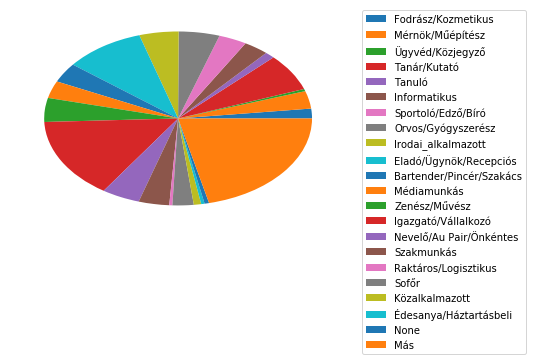

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#cs = ["brown", "sandybrown", "maroon", "darkmagenta", "deepskyblue"]
plt.pie(munkahelyek_szama.values())#, labels = munkahelyek_szama.keys())#[" ", "Mérnök/Műépítész", " ", "Tanár/Kutató", " ", " ", "Sportoló/Edző/Bíró", "Orvos/Gyógyszerész", " ", "Eladó/Ügynök/Recepciós", " ", " ", "Zenész/Művész", "Igazgató/Vállalkozó", " ", "Szakmunkás", " ", " ", " ", " ", "Más"])
plt.legend(munkahelyek_szama.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [57]:
def studdict(s):
    s = s.lower()
    s = szures(s)
    if "miko" in s: return u"Székely Mikó Kollégium, Sepsiszentgyörgy"
    elif "mikes" in s: return u"Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy"
    elif "nagy mozes" in s: return  u"Nagy Mózes Elméleti Líceum, Kézdivásárhely"
    elif "orban balazs" in s: return u"Orbán Balázs Gimnázium, Székelykeresztúr"
    elif "gabor aron" in s: return u"Gábor Áron Szakképző Líceum, Kézdivásárhely"
    elif "marton" in s \
        or "márton" in s: return u"Márton Áron Főgimnázium, Csíkszereda"
    elif "joannes kajoni" in s: return u"Joannes Kájoni Szakközépiskola, Csíkszereda"
    elif "tamasi aron" in s \
        or "egeszsegugyi foiskola szekelyudvarhely" in s \
        or "egeszsegugyi liceum" in s \
        or "aron egeszsegugyi" in s: return u"Tamási Áron Gimnázium, Székelyudvarhely"
    elif "nagy istvan " in s: return u"Nagy István Művészeti Líceum, Csíkszereda"
    elif "baroti szabo david" in s: return u"Baróti Szabó Dávid Iskolaközpont, Barót"
    elif "apor peter" in s: return u"Apor Péter Iskolaközpont, Kézdivásárhely"
    elif "liviu rebreanu balan" in s \
        or "grup scolar \"liviu rebreanu\"" in s: return u"Liviu Rebreanu Szakközépiskola, Balánbánya"
    elif "zeyk domokos" in s: return u"Székelykeresztúri Zeyk Domokos Iskolaközpont"
    elif "puskas tivadar szakkozepiskola" in s \
        or "puskas tivadar liceum sepsiszentgyorgy" in s: return u"Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy"
    elif "colegiul national \"mihai eminescu\"" in s \
        or "colegiul national mihai eminescu toplita" in s \
        or "colegiul national mihai eminescu,toplita,harghita" in s: return u"Colegiul National Mihai Eminescu, Maroshévíz"
    elif "gepgyarto iskolakozpont" in s: return u"Gépgyártó Iskolaközpont, Gyergyószentmiklós"
    elif "banyai janos" in s: return u"Bányai János Szakközépiskola, Székelyudvarhely"
    elif "batthyany ignac technikai kollegium" in s: return u"Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós"
    elif "grup scolar agricol sighisoara" in s: return u"Grup Școlar AgricoL, Segesvár"
    elif "aprily lajos" in s: return u"Áprily Lajos Főgimnázium, Brassó"
    elif "koss karoly" in s \
        or "kos karoly" in s: return u"Kós Károly Szakközépiskola, Székelyudvarhely"
    elif "bod peter tanitokepzo - kezdivasarhely" in s \
        or "bod peter tanitokepzo" in s: return u"Bod Péter Tanítóképző, Kézdivásárhely"
    elif "berde mozes unitarius gimnazium" in s: return u"Berde Mózes Unitárius Gimnázium, Székelykeresztúr"
    elif "taslauanu" in s: return u"Liceul Teoretic O. C. Taslauanu, Maroshévíz"
    elif "szovatai liceum" in s \
        or "domokos kazmer" in s: return u"Domokos Kázmér Iskolacsoport, Szováta"
    elif "salamon erno" in s: return u"Salamon Ernő Elméleti Líceum, Gyergyószentmiklós"
    elif "gaal mozes" in s: return u"Gaál Mózes Általános Iskola, Barót"
    elif "berde aron" in s: return u"Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy"
    elif "segito maria romai katolikus gimnazium" in s: return u"Segítő Mária Római Katolikus Gimnázium, Csíkszereda"
    elif "plugor sandor" in s: return u"Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy"
    elif "korosi csoma sandor kovaszna" in s: return u"Kőrösi Csoma Sándor Líceum, Kovászna"
    elif "bolyai farkas" in s: return u"Bolyai Farkas Elméleti Líceum, Marosvásárhely"
    elif "egeszsegugyi technikum csikszereda" in s: return u"Egészségügyi Technikum, Csíkszereda"
    elif "nagy imre" in s: return u"Nagy Imre Általános Iskola, Csíkszereda"
    elif "bathory" in s: return u"Báthory István Elméleti Líceum, Kolozsvár"
    elif "korond" in s: return u"Korondi Középiskola"
    elif "kezdivasarhelyi reformatus kollegium" in s \
        or "reformatus kollegium kezdivasarhely" in s: return u"Református Kollégium, Kézdivásárhely"
    elif "ady endre" in s: return u"Ady Endre Elméleti Líceum, Nagyvárad"
    elif "ubb" in s \
        or "babes" in s \
        or "babaes" in s \
        or "babe?" in s \
        or "bbte" in s \
        or "u.b.b" in s \
        or "f.s.e.g.a" in s \
        or "fsega" in s: return  u"Babeș- Bolyai Tudományegyetem, Kolozsvár"
    elif "umf tg mures" in s \
        or "university of medicine and pharmacy of targu mure?" in s \
        or "university of medicine and pharmacy targu mures" in s \
        or "universitatea de medicina si farmacie tg mures" in s \
        or "universitatea de medicina si farmacie targu mures" in s \
        or "universitatea de medicina si farmacie targu-mures" in s \
        or "university of medicine and pharmacy of targu mures" in s \
        or "university of medicine and pharmacy tg mures" in s \
        or "umf targu mures" in s \
        or "umf tgmures" in s \
        or "umf fogorvosi kar" in s \
        or "mogye" in s \
        or "umftgm" in s \
        or "imf tg." in s \
        or "facultatea de medicina targu mures" in s\
        or "facultatea de farmacie, tg.mures" in s \
        or "scoala doctorala umf targu mures" in s \
        or "marosvasarhelyi orvosi egyetem" in s \
        or "marosvasarhelyi orvosi" in s \
        or "orvosi es gyogyszereszeti egyetem marosvasarhely" in s \
        or "marosvasarhelyi orvosi és gyogyszereszeti" in s: return u"Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem"
    elif "sapientia" in s \
        or "emte" in s: return u"Sapientia Erdélyi Magyar Tudományegyetem"
    elif "hatieganu" in s \
        or "hateganu" in s: return u"Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem" 
    elif "universitatea politehnica cluj-napoca" in s \
        or "universitatea technica cluj-napoca" in s \
        or "universitatea tehnica din cluj napoca" in s \
        or "universitatea tehnica cluj napoca" in s \
        or "universitatea tehnica cluj-napoca" in s \
        or "universitatea tehnica din cluj-napoca" in s \
        or "utcn" in s \
        or "utc-n" in s \
        or "ut cluj" in s \
        or "technical university of cluj" in s \
        or "facultatea de constructii cluj-napoca" in s \
        or "facultatea de arhitectura si urbanism cluj-napoca" in s \
        or "muszaki egyetem kolozsvar" in s \
        or "kolozsvari muszaki egyetem" in s: return u"Műszaki Egyetem, Kolozsvár"
    elif "transylvania" in s \
        or "transilvania" in s: return u"Transilvania Egyetem, Brassó"
    elif "petru maior university of târgu mureș" in s \
        or "universitatea petru maior" in s \
        or "petru maior targu mures" in s \
        or "petru maior" in s \
        or "universitatea \"petru maior\"" in s: return u"Petru Maior Egyetem, Marosvásárhely"
    elif "medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si de medicina veterinara" in s \
        or "universitatea de stiinte agricole si medicina veterinara din cluj-napoca" in s \
        or "usamv" in s: return u"Kolozsvári Agrártudományi és Állatorvosi Egyetem"
    elif "universitatea lucian blaga sibiu" in s \
        or "lucian blaga university of sibiu" in s: return u"Lucian Blaga Egyetem, Nagyszeben"
    elif "udc amf targu-mures" in s \
        or "dimitrie cantemir" in s: return u"Dimitrie Cantemir Egyetem"
    elif "spiru haret" in s: return u"Spiru Haret Egyetem"
    elif "bukaresti egyetem" in s \
        or "university of bucharest" in s \
        or "universitatea din bucuresti" in s: return u"Bukaresti Egyetem"
    elif "partium" in s: return u"Partiumi Keresztény Egyetem, Nagyvárad"
    elif "universitatea \"george baritiu\" brasov" in s: return u"George Barițiu Egyetem, Barassó"
    elif "gh. dima" in s \
        or"gheorghe dima" in s: return u"Gheorghe Dima Zeneakadémia, Kolozsvár"
    elif "universitatea de arta teatrala tg mures" in s\
        or "universitatea de arta teatrala tirgu mures" in s \
        or "universitatea de arte din targu-mures" in s \
        or "universitatea de arte din targu mures" in s \
        or "universitatea de arte tirgu-mures" in s \
        or "universitatea de arte tirgu mures" in s \
        or "universitatea de arte tg-mures" in s \
        or "muveszeti egyetem" in s \
        or "academia de teatru si film targul mures" in s: return u"Marosvásárhelyi Művészeti Egyetem"
    elif "politehnica bucuresti" in s: return u"Műszaki Egyetem, Bukarest"
    elif "universitatea politehnica din timisoara" in s \
        or "universitatea politehnica timisoara" in s \
        or "universitatea \"politehnica\" din timi?oara" in s \
        or "temesvari muszaki egyetem" in s \
        or "politehnica university of timisoara" in s: return u"Műszaki Egyetem, Temesvár"
    elif "universitatea de arta si design cluj napoca" in s \
        or "universitatea de arta si design - cluj napoca" in s: return u"Képzőművészeti és Formatervezési Egyetem, Kolozsvár"
    elif "hyperion" in s: return u"Hyperion Egyetem, Bukarest"
    elif "none" in s \
        or "meg nincs" in s \
        or "nem jartam" in s \
        or "scoala vieti" in s \
        or "facultatea vieti" in s \
        or "no " in s \
        or "nu " in s \
        or "nici una" in s \
        or "sehol" in s \
        or "fara" in s \
        or "nicaieri" in s \
        or "nincs" in s \
        or "None" in s \
        or "nem jartam egyetemre" in s \
        or "elet " in s: return u"Nincs"
        
    else: return u"Más" 
        #print(s)

In [58]:
intezmeny = ["Más", "Nincs" ,"Babeș- Bolyai Tudományegyetem, Kolozsvár", "Nagy Mózes Elméleti Líceum, Kézdivásárhely", "Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy", "Székely Mikó Kollégium, Sepsiszentgyörgy", "Márton Áron Főgimnázium, Csíkszereda", "Korondi Középiskola",
           "Orbán Balázs Gimnázium, Székelykeresztúr", "Báthory István Elméleti Líceum, Kolozsvár", "Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem", "Sapientia Erdélyi Magyar Tudományegyetem", "Gábor Áron Szakképző Líceum, Kézdivásárhely",  "Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem",
          "Baróti Szabó Dávid Iskolaközpont, Barót","Tamási Áron Gimnázium, Székelyudvarhely", "Nagy István Művészeti Líceum, Csíkszereda", "Műszaki Egyetem, Kolozsvár", "Transilvania Egyetem, Brassó", "Petru Maior Egyetem, Marosvásárhely", "Apor Péter Iskolaközpont, Kézdivásárhely",
            "Liviu Rebreanu Szakközépiskola, Balánbánya", "Lucian Blaga Egyetem, Nagyszeben", "Székelykeresztúri Zeyk Domokos Iskolaközpont", "Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy", "Dimitrie Cantemir Egyetem", "Colegiul National Mihai Eminescu, Maroshévíz","Egészségügyi Technikum, Csíkszereda",
            "Gépgyártó Iskolaközpont, Gyergyószentmiklós", "Bányai János Szakközépiskola, Székelyudvarhely", "Joannes Kájoni Szakközépiskola, Csíkszereda", "Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós", "Grup Școlar AgricoL, Segesvár", "Spiru Haret Egyetem","Nagy Imre Általános Iskola, Csíkszereda",
             "Áprily Lajos Főgimnázium, Brassó", "Kós Károly Szakközépiskola, Székelyudvarhely", "Bod Péter Tanítóképző, Kézdivásárhely", u"Bukaresti Egyetem", "Berde Mózes Unitárius Gimnázium, Székelykeresztúr", "Liceul Teoretic O. C. Taslauanu, Maroshévíz", "Domokos Kázmér Iskolacsoport, Szováta",
            "Kolozsvári Agrártudományi és Állatorvosi Egyetem", "Salamon Ernő Elméleti Líceum, Gyergyószentmiklós", "Gaál Mózes Általános Iskola, Barót", "Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy", "Partiumi Keresztény Egyetem, Nagyvárad", "Segítő Mária Római Katolikus Gimnázium, Csíkszereda",
            "Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy", "George Barițiu Egyetem, Barassó", "Kőrösi Csoma Sándor Líceum, Kovászna", "Gheorghe Dima Zeneakadémia, Kolozsvár", "Bolyai Farkas Elméleti Líceum, Marosvásárhely", "Marosvásárhelyi Művészeti Egyetem", "Műszaki Egyetem, Bukarest", "Műszaki Egyetem, Temesvár",
            "Hyperion Egyetem, Bukarest", "Ady Endre Elméleti Líceum, Nagyvárad","Képzőművészeti és Formatervezési Egyetem, Kolozsvár", "Református Kollégium, Kézdivásárhely"]
iskolak = dict.fromkeys(intezmeny,0)
iskolak_csoport = dict.fromkeys(intezmeny)
for key, _ in iskolak_csoport.items():
    iskolak_csoport[key] = []
    
for key, el in schools.items():
    i = studdict(key)
    if i in iskolak:
        iskolak[i] = iskolak[i] + el

for key, el in iskolak.items():
    print(key, el)
ossz= 0    
for key, el in schools.items():
    ossz = ossz + el
print(ossz)

Más 6762
Nincs 409
Babeș- Bolyai Tudományegyetem, Kolozsvár 4063
Nagy Mózes Elméleti Líceum, Kézdivásárhely 188
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy 88
Székely Mikó Kollégium, Sepsiszentgyörgy 142
Márton Áron Főgimnázium, Csíkszereda 122
Korondi Középiskola 72
Orbán Balázs Gimnázium, Székelykeresztúr 362
Báthory István Elméleti Líceum, Kolozsvár 11
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem 950
Sapientia Erdélyi Magyar Tudományegyetem 779
Gábor Áron Szakképző Líceum, Kézdivásárhely 564
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem 111
Baróti Szabó Dávid Iskolaközpont, Barót 550
Tamási Áron Gimnázium, Székelyudvarhely 154
Nagy István Művészeti Líceum, Csíkszereda 43
Műszaki Egyetem, Kolozsvár 541
Transilvania Egyetem, Brassó 674
Petru Maior Egyetem, Marosvásárhely 651
Apor Péter Iskolaközpont, Kézdivásárhely 260
Liviu Rebreanu Szakközépiskola, Balánbánya 449
Lucian Blaga Egyetem, Nagyszeben 248
Székelykeresztúri Zeyk Domokos Iskolaközpont 166
Puskás Tivadar Szakköz

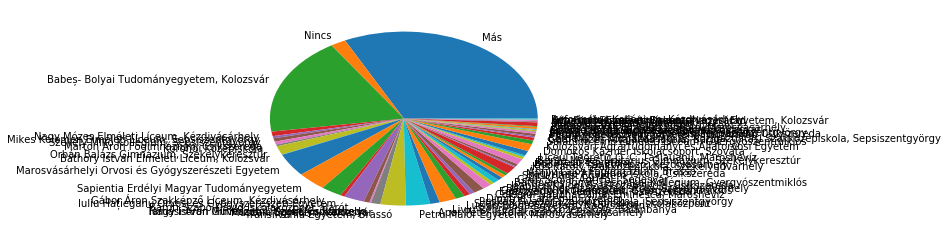

In [41]:
plt.pie(iskolak.values(),labels=[(i) for i in iskolak.keys()])
plt.show()

In [60]:
db = 0
for d in pure_data:
    if "workwhat" in d:
        m = workdict(d["workwhat"])
        #print(m, d["workwhat"])
        d["workwhat"] = m
    if "studwhere" in d:
        s = studdict(d["studwhere"])
        #if s == 'Más':
         #   print(s, "****", d["studwhere"])
        d["studwhere"] = s
        
print(pure_data[:5])

[{'id': 0, 'birth': 'keresztur', 'name': 'boholt lore', 'studwhere': 'Orbán Balázs Gimnázium, Székelykeresztúr', 'livesin': 'szèkelykeresztur, harghita, romania'}, {'id': 1, 'livesin': 'csikszentdomokos', 'other1': 'venczel józsef iskolaközpont   csíkszereda', 'birth': 'csikszereda', 'name': 'nelut kémenes'}, {'marriedto': 'péterfy eniko', 'studwhere': 'Nincs', 'livesin': 'angyalföld, budapest, hungary', 'workwhere': 'drogmentes világért alapítvány   magyarország', 'name': 'kovács iulia', 'birth': 'udvarhely', 'id': 2, 'workwhat': 'Igazgató/Vállalkozó'}, {'id': 3, 'name': 'monica ana szep', 'birth': 'barot', 'livesin': 'budapest, hungary'}, {'birth': 'szentgyorgy', 'name': 'matei szabolcs', 'marriedto': 'lászló tünde', 'id': 4}]


In [59]:
db = 0
for d in pure_data:
    if "studwhere" in d:
        if d["studwhere"] == 'Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem':
            db = db + 1
print(db)

948
